# Basic Training for Deep Neural Networks
by [David Ohm](http://ohmdsp.github.io/)
/ [GitHub](https://github.com/ohmdsp)

In this notebook we are going to learn how to use gradient descent to train a neural network.

What we're really interested in is letting the computer figure out what representations are needed to describe the data given some objective that we've defined.  That is the fundamental idea behind machine learning: letting the machine learn from the data.

We will go over some background on gradient descent and the different components of a neural network.  

## Gradient Descent

To create a neural network, we have to define a set of operations.  These operations try to take us from some input to some output.  For instance, the input might be an image, video frame, text file, or sound file.  The operations of the network are meant to transform this input data into something the network can learn.

Initially, all parameters of the network are random.  So whatever is being output will also be random.  But let's say we need it to output something specific about the image.  To teach it to do that, we're going to use something called "Gradient Descent". Gradient descent is a way of optimizing a set of parameters.

## Defining A Cost Function

We need to define what "best" means.  In order to do this, we need a measure of the "error".

For example, imagine I have a few images of dogs and a few images of cats. I can feed them into a network that is randomly initialized and somehow the network will produce a 0 or 1.  Except, the parameters of my network are totally random, and so my network will only ever spit out random 0s or 1s.  How can I get this random network to know when to spit out a 0 for images of dogs, and a 1 for images of cats?

We do that by defining, if the network predicts a 0 for an dog, then the error is 0.  If the network predicts a 1 for an dog, then the error is 1.  And vice-versa for cats. What we've just done is create a function which describes error in terms of our parameters.

Let's write this another way:

\begin{align}
\text{error} = \text{network}(\text{image}) - \text{true label}
\end{align}

where

\begin{align}
\text{network}(\text{image}) = \text{predicted label}
\end{align}

More commonly, we'll see these components represented by the following letters:

\begin{align}
E = f(X) - y
\end{align}

## Minimizing Error

Instead of feeding one image at a time, we're going to feed in many images (called a "batch").  Let's say the batch size is 100.  This way, we can see what our network is doing, on average.  If our error is e.g. 50/100, we're correctly guessing about 50 of the 100 images (i.e., like flipping a coin).

We adjust the network parameters a tiny bit and see what happens to the error. We can use this result to iterate on adjustments that reduce the error.  Thie method used to do this is gradient descent.  The error provides a "training signal" or a measure of the "loss" of our network.  You'll often hear a number of terms used to describe the same thing, "Error", "Cost", "Loss", or "Training Signal'.  Of course we've made a lot of assumptions in assuming our function is continuous and differentiable.  But we're not going to worry about that, and if you don't know what that means, don't worry about it.

## Backpropagation

Gradient descent is a simple but very powerful method for finding smaller measures of error by following the negative direction of a computed gradient.  The gradient is a measure of how the error changes at the current set of parameters.

In order to compute the gradient, we use something called backpropagation.  When we pass an input to a neural network for computation, it is called "forward propagation."  We're taking an input and multiplying it by every weight to get an output.  The difference of that output to the desired output gets *backpropagated* to every single parameter in our network.  Basically, backprop is a very effective way to find the gradient by simply multiplying many partial derivatives together.

If you are interested in knowing more details about backprop, Take a look at Michael Nielsen's online Deep Learning book:

http://neuralnetworksanddeeplearning.com/

and Yoshua Bengio's online book:

http://www.deeplearningbook.org/


## Extra details for notebook only

To dive a little deeper, the definition of a linear function can be written as:

\begin{align}
y = mx + b
\end{align}

The slope, or gradient of this function is $m$ everywhere.  It's describing how the function changes with different network parameters.  If I follow the negative value of $m$, then I'm going down the slope, towards smaller values.

But not all functions are linear.  Let's say the error was something like a parabola:

\begin{align}
y(x) = x^2
\end{align}

That just says, there is a function y, which takes one parameter, $x$, and this function just takes the value of $x$ and multiplies it by itself.  Let's start at the minimum.  At $x = 0$, our function $y(0) = 0$.  Let's try and move a random amount, and say we end up at $1$.  So at $x = 1$, we know that our function went up from $y(0) = 0$ to $y(1) = 1$.  The change in $y = 1$.  The change in $x = 1$.  So our slope is

\begin{align}
\frac{\text{change in } y}{\text{change in } x} = \frac{(y(1) - y(0)}{(1 - 0)} = \frac{1}{1} = 1
\end{align}

If we go in the negative direction of this, $x = x - 1$, we get back to 0, our minimum value. If you try this process for any value and you'll see that if you keep going towards the negative slope, you go towards smaller values.

You can interate this process using

\begin{align}
\theta = \theta - \eta \cdot \nabla_\theta J( \theta)
\end{align}

We're going to update our parameters, commonly referred to by $\theta$, by finding the gradient, $\nabla$ with respect to parameters $\theta$, $\nabla_\theta$, of our error, $J$, and moving down the negative direction of it: $- \eta \cdot \nabla_\theta J( \theta)$.  The $\eta$ is just a parameter also known as the learning rate, and it describes how far along this gradient we should travel, and we'll typically set this value from anywhere between 0.01 to 0.00001.

<a name="local-minimaoptima"></a>
## Local Minima/Optima

To start, we need some library imports.

In [1]:
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
#plt.style.use('ggplot')
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


In [2]:
print(tf.__version__)

2.10.1


Let's say that our cost function looked like the following

Text(0.5, 0, 'Some Parameter')

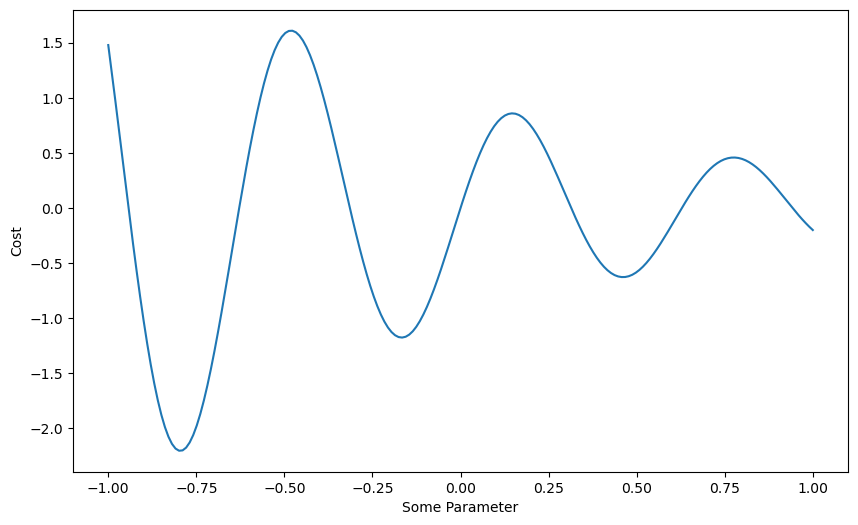

In [3]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')

We'll never be able to see our entire cost function like this. But if we could, we would know exactly what parameter value we should use to minimize cost.  So we're just imagining that as any parameters in our network change, this is how cost would change.  Since we know the value of the cost everywhere, we can easily describe the gradient using `np.diff`, which will just measure the difference between every value.  That's a good approximation of the gradient for illustration purposes.

In [4]:
gradient = np.diff(cost)

We can follow the negative gradient of this function given some randomly intialized parameter and a learning rate.

C:\Users\ohmds\AppData\Local\Temp\ipykernel_10852\914514251.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))


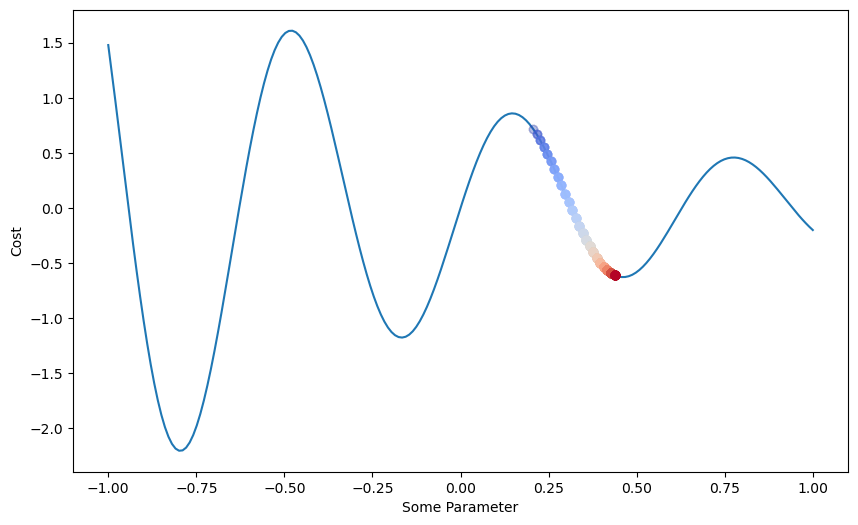

In [5]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')
n_iterations = 500
cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
init_p = 120#np.random.randint(len(x)*0.2, len(x)*0.8)
learning_rate = 1.0
for iter_i in range(n_iterations):
    init_p -= learning_rate * gradient[int(init_p)]
    ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

What this shows is that depending on where our random initialization of weights began, our final cost might end up at a local minima, not the global minima.

This illustration is just for a single parameter. However, our networks will often have millions of parameters. I'll illustrate the same idea with just two parameters to give you a sense of how quickly the problem becomes very difficult.

C:\Users\ohmds\AppData\Local\Temp\ipykernel_10852\2292993338.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 0, 'Cost')

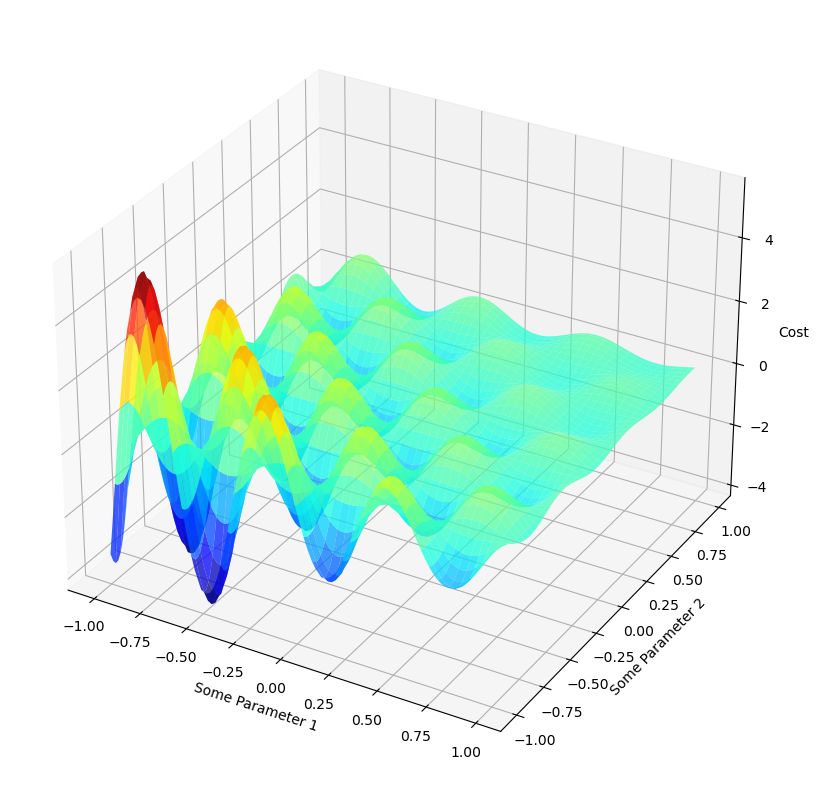

In [6]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Some Parameter 1')
ax.set_ylabel('Some Parameter 2')
ax.set_zlabel('Cost')
# ax.axis('off')

It turns out that in practice, as the number of your parameters grows, say to a million, then finding a local minima will more often than not turn out to be a very good minima.  That's good news for deep networks.

## Learning Rate

Another important aspect of learning is how far along the gradient we should move our parameters.  That is also known as the `learning_rate`.  Let's see what happens for different values of our learning rate.

C:\Users\ohmds\AppData\Local\Temp\ipykernel_10852\1205818309.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))


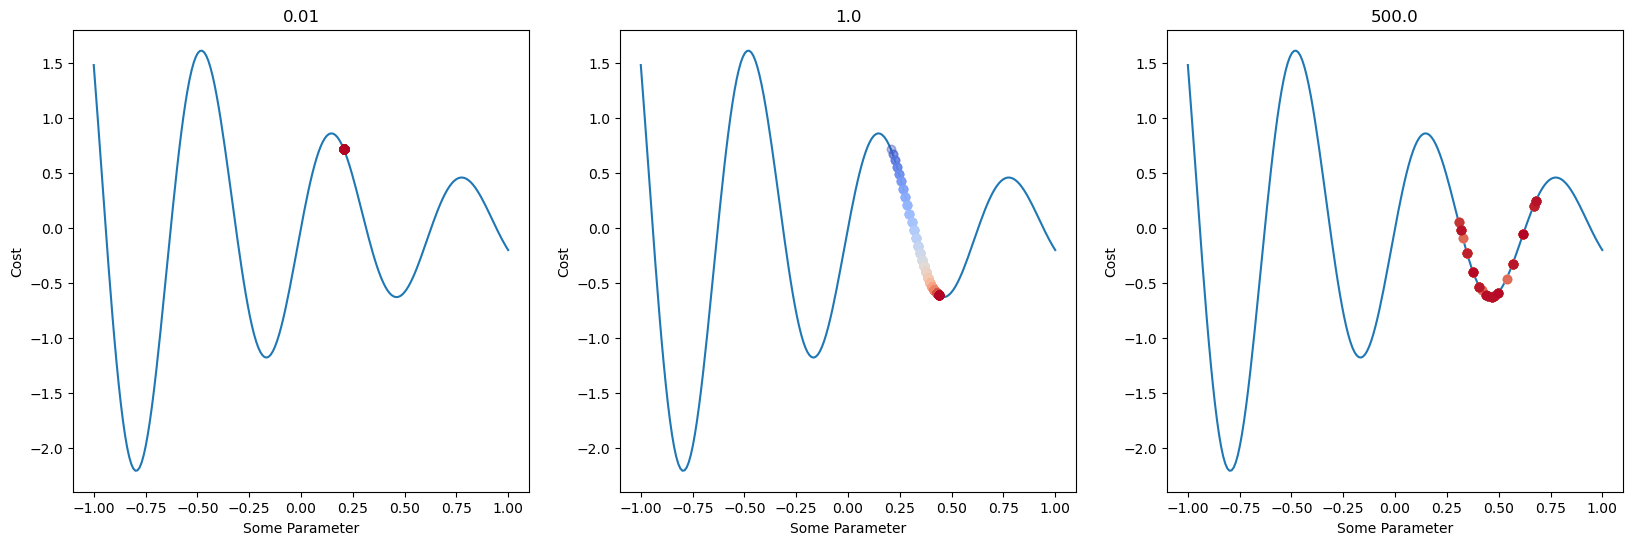

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for rate_i, learning_rate in enumerate([0.01, 1.0, 500.0]):
    ax = axs[rate_i]
    x = np.linspace(-1, 1, 200)
    hz = 10
    cost = np.sin(hz*x)*np.exp(-x)
    ax.plot(x, cost)
    ax.set_ylabel('Cost')
    ax.set_xlabel('Some Parameter')
    ax.set_title(str(learning_rate))
    n_iterations = 500
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    init_p = 120#np.random.randint(len(x)*0.2, len(x)*0.8)
    for iter_i in range(n_iterations):
        init_p -= learning_rate * gradient[int(init_p)]
        ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

In the first case, the learning rate was too small.  It didn't allow for a better cost than where it started.  In the second case, the learning rate was good.  In the third case, the learning rate was too large and it resulted in an overshot of the minima causing the the cost to go up and down, instead of settling in on a minima.

We'll learn some tricks for changing the cost landscape to be a bit more concave, reducing the number of local minima by regularizing. First, let's create a neural network.

## Creating a Neural Network

Let's create a simple example network.  We're going try to find a mapping of an input `X` to an output `y`, just like in our example of mapping an input image to either a 0 or 1.

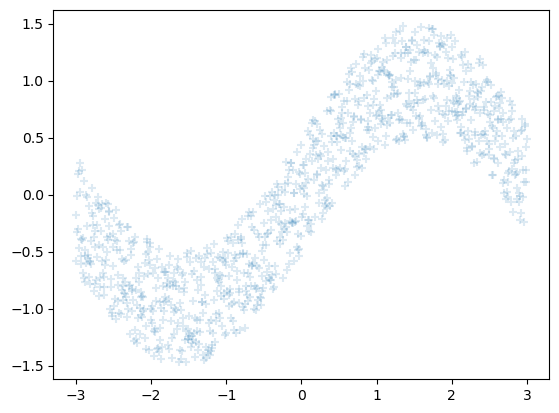

In [8]:
# Let's create some toy data

# We are going to say that we have seen 1000 values of some underlying representation that we aim to discover
n_observations = 1000

# Instead of having an image as our input, we're going to have values from -3 to 3.  This is going to be the input to our network.
xs = np.linspace(-3, 3, n_observations)

# From this input, we're going to teach our network to represent a function that looks like a sine wave.  
# To make it difficult, we are going to create a noisy representation of a sine wave by adding uniform noise.  
# So our true representation is a sine wave, but our algorithm needs to discover this given the sin wave plus noise. 
y_train = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, y_train, alpha=0.15, marker='+')

In [9]:
#Generate dummy data
#xs = np.linspace(1,2,100).reshape(-1,1)
#y_train = xs*5

In [10]:
y_train.shape

(1000,)

We can see that there is an underlying sine wave but it's really noisy.  We want to train a network so that, given any value on the $x$ axis, tell me what the value should be on the $y$ axis. This is the fundamental idea of regression.  Predicting some continuous output value given some continuous input value.

## Defining Cost

We're going to use tensorflow to train our network to do this regression.

In [11]:
def baseline_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(1,activation='linear',input_dim=1))
    sgd = tf.keras.optimizers.SGD(learning_rate=0.2)
    model.compile(loss = 'mean_squared_error', optimizer=sgd, metrics = ['accuracy'])
    return model

In [12]:
# Print out the network structure. This one is very simple single activation unit. Too simple, as you will see.
regr = baseline_model()
regr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Train the network
regr.fit(xs, y_train, epochs=4, batch_size=1)

Epoch 1/4
1000/1000 [==============================] - 1s 787us/step - loss: 3406.5481 - accuracy: 0.0000e+00
Epoch 2/4
1000/1000 [==============================] - 1s 773us/step - loss: 54.3925 - accuracy: 0.0000e+00
Epoch 3/4
1000/1000 [==============================] - 1s 827us/step - loss: 175.3064 - accuracy: 0.0000e+00
Epoch 4/4
1000/1000 [==============================] - 1s 818us/step - loss: 4754.1899 - accuracy: 0.0000e+00


32/32 [==============================] - 0s 580us/step


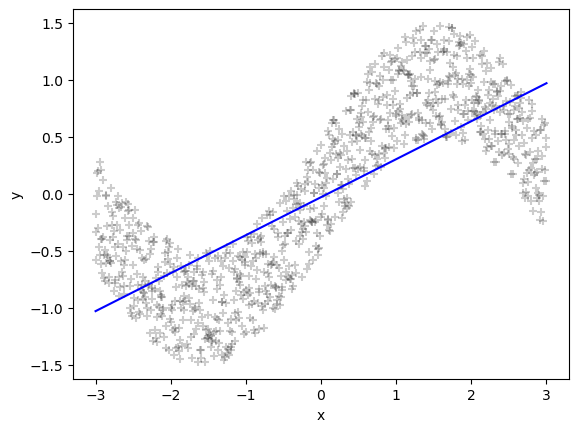

In [14]:
# Plot neural network model
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(xs, y_train,  color='k',alpha=0.20, marker='+')
ax.plot(xs, regr.predict(xs),color='b')
plt.show()

Despite the training, our model still only predicts a line to fit the data. In order to get more complexity, we could consider changing our input's representation.  For instance, if you are working with sound, it may not be the best idea to think about representing the sound as a signal, and instead you might want to explore using something like the discrete fourier transform.  Or if you're working with text, there may be other representations that will allow you to learn more useful features of your data such as word histograms.  There may be other possibilities depending on your application.

## Add Non-Linear Activation Layers to Model
How else can we get our line to express the curves in our data?  What we'll explore instead is what happens when you add a non-linearity, which you might also hear be called an activation function.  That is an essential ingredient to any deep network.  Practically every complex deep learning algorithm performs a series of linear, followed by nonlinear operations.  By stacking sets of these, the complexity and power of expression grows far greater than any linear equation could.

In [15]:
#clear the previous model
tf.compat.v1.reset_default_graph()

In [16]:
def baseline_model_nonlinear():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(1,input_dim=1))
    model.add(tf.keras.layers.Activation('tanh'))
    sgd = tf.keras.optimizers.SGD(learning_rate=0.2)
    model.compile(loss = 'mean_squared_error', optimizer=sgd, metrics = ['accuracy'])
    return model

In [17]:
regr_nonlinear = baseline_model_nonlinear()
regr_nonlinear.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [18]:
regr_nonlinear.fit(xs, y_train, epochs=4, batch_size=1)

Epoch 1/4
1000/1000 [==============================] - 1s 884us/step - loss: 0.1573 - accuracy: 0.0000e+00
Epoch 2/4
1000/1000 [==============================] - 1s 898us/step - loss: 0.1573 - accuracy: 0.0000e+00
Epoch 3/4
1000/1000 [==============================] - 1s 987us/step - loss: 0.1587 - accuracy: 0.0000e+00
Epoch 4/4
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1587 - accuracy: 0.0000e+00


32/32 [==============================] - 0s 630us/step


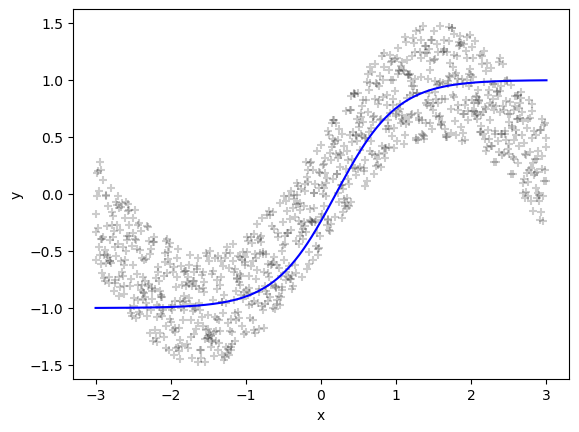

In [19]:
# Plot neural network model
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(xs, y_train,  color='k',alpha=0.20, marker='+')
ax.plot(xs, regr_nonlinear.predict(xs),color='b')
plt.show()

## Introducing More Layers (i.e., Going Deeper)

What happens if we add more layers to the network model?

In [20]:
# clear the previous model
tf.compat.v1.reset_default_graph()

In [21]:
def baseline_model_nonlinear():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(100,input_dim=1))
    model.add(tf.keras.layers.Activation('tanh'))
    model.add(tf.keras.layers.Dense(10,activation='tanh'))
    model.add(tf.keras.layers.Dense(1,activation='tanh'))
    sgd = tf.keras.optimizers.SGD(learning_rate=0.2)
    model.compile(loss = 'mean_squared_error', optimizer=sgd, metrics = ['accuracy'])
    return model

In [22]:
regr_nonlinear = baseline_model_nonlinear()
regr_nonlinear.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [23]:
y_train.shape

(1000,)

In [24]:
regr_nonlinear.fit(xs, y_train, epochs=4, batch_size=100)

Epoch 1/4
10/10 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.0000e+00
Epoch 2/4
10/10 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.0000e+00
Epoch 3/4
10/10 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.0000e+00
Epoch 4/4
10/10 [==============================] - 0s 1ms/step - loss: 0.1705 - accuracy: 0.0000e+00


32/32 [==============================] - 0s 710us/step


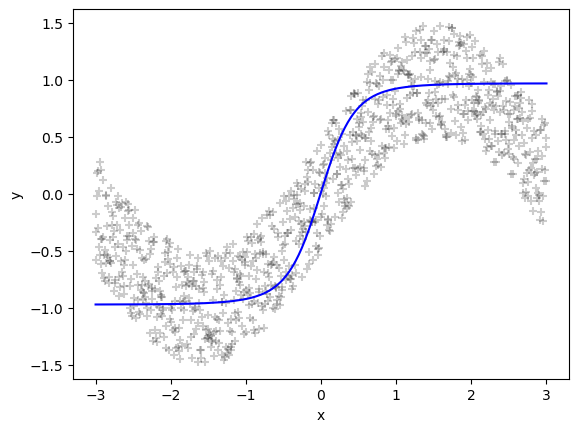

In [25]:
# Plot neural network model
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(xs, y_train,  color='k',alpha=0.20, marker='+')
ax.plot(xs, regr_nonlinear.predict(xs),color='b')
plt.show()

## Try This
Try changing the activation function to see what differences it makes in the regression output. You might also want to try making the netwrork more complex (e.g., add neurons, add layers, etc). Spend time exploring the results from changing the learning rate and optimzation methods. 

## Using a Custom Loss Function
Sometimes it might be useful to use a custom cost function. Or, maybe you just want to explore what happens when using various non-typical cost functions. This is easy to do.

In [26]:
# This is actually just L1 distance, but using it here as an example
def customLoss(y_true, y_pred):
    return tf.abs(y_true - y_pred)

In [27]:
def baseline_model_customLoss():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(10,activation='tanh',input_dim=1))
    sgd = tf.keras.optimizers.SGD(learning_rate=0.2)
    model.compile(loss = customLoss, optimizer=sgd, metrics = ['accuracy'])
    return model

In [28]:
regr_customLoss = baseline_model_customLoss()
regr_customLoss.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [29]:
regr_customLoss.fit(xs, y_train, epochs=4, batch_size=10)

Epoch 1/4
100/100 [==============================] - 0s 1ms/step - loss: 0.4147 - accuracy: 0.0000e+00
Epoch 2/4
100/100 [==============================] - 0s 1ms/step - loss: 0.3249 - accuracy: 0.0000e+00
Epoch 3/4
100/100 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.0000e+00
Epoch 4/4
100/100 [==============================] - 0s 1ms/step - loss: 0.3184 - accuracy: 0.0000e+00


32/32 [==============================] - 0s 590us/step


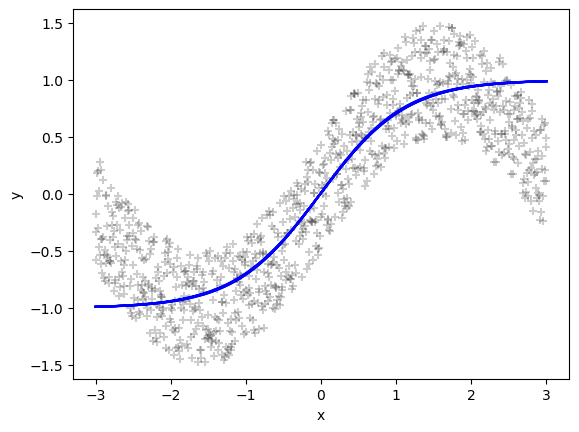

In [30]:
# Plot neural network model
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(xs, y_train,  color='k',alpha=0.20, marker='+')
ax.plot(xs, regr_customLoss.predict(xs),color='b')
plt.show()